<a href="https://colab.research.google.com/github/DevikaSreemon/Term-Deposit-Marketing/blob/project/Term_Market_Deposit_Part_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Analysis for Subscriber Segmentation**

In the last step, now we need to analyze the characteristics of customers who have already subscribed to the investment product. We are intrested to identify patterns in customer demographics and behavior. Key areas to focus include:

Customer demographics (e.g., age, job, marital status, education)

Financial indicators (e.g., balance, credit history, loans)


### 1. Import Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from collections import defaultdict

###2. Load dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/ApzivaProjects")

# Importing dataset
path = r'term-deposit-marketing-2020.csv'
data = pd.read_csv(f"{path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Descriptive Data Analysis

In [8]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


##### Select only subscribing customers

In [9]:
# Filter customers who subscribed (y = 'yes')
subscribed_customers = data[data['y'] == 'yes']

# Display the filtered data
print(subscribed_customers)

       age         job   marital  education default  balance housing loan  \
83      59       admin   married  secondary      no     2343     yes   no   
86      56       admin   married  secondary      no       45      no   no   
87      41  technician   married  secondary      no     1270     yes   no   
129     55    services   married  secondary      no     2476     yes   no   
168     54       admin   married   tertiary      no      184      no   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
39986   29  management    single   tertiary      no      637     yes   no   
39988   55  management  divorced   tertiary      no     2383      no   no   
39990   26  technician    single  secondary      no     1231     yes   no   
39996   30  management    single   tertiary      no     3340      no   no   
39997   54       admin  divorced  secondary      no      200      no   no   

        contact  day month  duration  campaign    y  
83      unknown    5 

In [10]:
# Remove columns 'day', 'month', 'duration', and 'campaign'
df = subscribed_customers.drop(columns=["day", "month", "duration", "campaign"])

# Display the filtered data
print(df)

       age         job   marital  education default  balance housing loan  \
83      59       admin   married  secondary      no     2343     yes   no   
86      56       admin   married  secondary      no       45      no   no   
87      41  technician   married  secondary      no     1270     yes   no   
129     55    services   married  secondary      no     2476     yes   no   
168     54       admin   married   tertiary      no      184      no   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
39986   29  management    single   tertiary      no      637     yes   no   
39988   55  management  divorced   tertiary      no     2383      no   no   
39990   26  technician    single  secondary      no     1231     yes   no   
39996   30  management    single   tertiary      no     3340      no   no   
39997   54       admin  divorced  secondary      no      200      no   no   

        contact    y  
83      unknown  yes  
86      unknown  yes  
87    

### 3. K-mean Clustering

In [11]:
# Preprocessing: One-hot encode categorical variables and scale numeric ones
numeric_features = ["age", "balance"]
categorical_features = ["job", "marital", "education", "housing", "contact"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)

# Transform the data
X = preprocessor.fit_transform(df)

In [16]:
# Create separate encoders for job and education
encoder_job = OneHotEncoder()
encoder_edu = OneHotEncoder()

# Fit the encoders on the respective columns
encoder_job.fit(df[["job"]])
encoder_edu.fit(df[["education"]])

# Print categories
print("Job categories:")
print(encoder_job.categories_)

print("\nEducation categories:")
print(encoder_edu.categories_)

Job categories:
[array(['admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)]

Education categories:
[array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)]


In [ ]:
# Preprocessing: Encode categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'y']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    df[col] = label_encoders[col].fit_transform(df[col])

# Scale numerical features for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

print(scaled_data)

[[ 1.74135402 -1.36677892 -0.3305499  ... -0.38863014  2.09415239
   0.        ]
 [ 1.46862884 -1.36677892 -0.3305499  ... -0.38863014  2.09415239
   0.        ]
 [ 0.10500296  1.3855757  -0.3305499  ... -0.38863014  2.09415239
   0.        ]
 ...
 [-1.25862292  1.3855757   1.17459556 ... -0.38863014 -0.52444231
   0.        ]
 [-0.89498935 -0.1435102   1.17459556 ... -0.38863014 -0.52444231
   0.        ]
 [ 1.28681206 -1.36677892 -1.83569536 ... -0.38863014 -0.52444231
   0.        ]]


####3.1. Determine Clusters using Elbow method

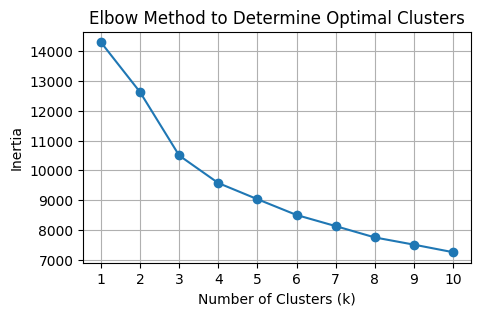

In [ ]:
import random
seed = random.randint(1000,9999)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)  # Test for 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(5, 3))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


From the graph you provided, the elbow point appears to be around 3rd or 4th clusters, where the reduction in inertia slows noticeably.

In [ ]:
# Choose the optimal k (e.g., from the Elbow plot, assume optimal k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=seed)

# Fit KMeans to the scaled data and get cluster labels
df["cluster_labels"] = kmeans.fit_predict(X)

# View the results
print(df)



       age  job  marital  education  default  balance  housing  loan  contact  \
83      59    0        1          1        0     2343        1     0        2   
86      56    0        1          1        0       45        0     0        2   
87      41    9        1          1        0     1270        1     0        2   
129     55    7        1          1        0     2476        1     0        2   
168     54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
39986   29    4        2          2        0      637        1     0        0   
39988   55    4        0          2        0     2383        0     0        0   
39990   26    9        2          1        0     1231        1     0        0   
39996   30    4        2          2        0     3340        0     0        0   
39997   54    0        0          1        0      200        0     0        0   

       y  cluster_labels  c

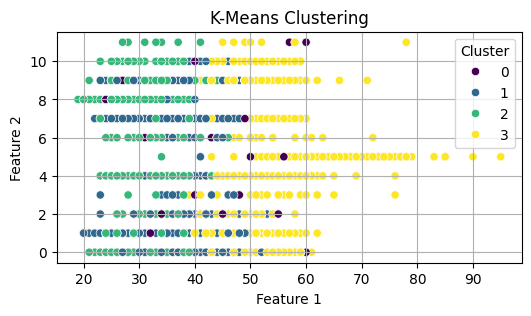

In [ ]:
# Visualize the clusters (if using 2D or 3D data)
# Example for 2D data (replace with relevant features)
plt.figure(figsize=(6, 3))
sns.scatterplot(
    x=df.iloc[:, 0],  # Changed from numerical_data to subscribed_customers
    y=df.iloc[:, 1],  # Changed from numerical_data to subscribed_customers
    hue=df['cluster_labels'],  # Use the 'Cluster' column from subscribed_customers
    palette='viridis'
)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Display cluster centers
#print("Cluster Centers (scaled):")
#print(kmeans.cluster_centers_)

In [ ]:
from collections import defaultdict

# Group by clusters
cluster_groups = df.groupby('cluster_labels')

# Initialize a dictionary to store the summary
cluster_summary = defaultdict(list)

# Iterate over each cluster
for cluster, group in cluster_groups:
    cluster_summary['Cluster'].append(cluster)

    # Numerical columns: calculate median
    cluster_summary['Age'].append(group['age'].median())
    cluster_summary['Balance'].append(group['balance'].median())
    #cluster_summary['Median Day'].append(group['day'].median())
    #cluster_summary['Median Duration'].append(group['duration'].median())
    #cluster_summary['Median Campaign'].append(group['campaign'].median())

    # Categorical columns: calculate mode and percentage
    cluster_summary['Job'].append(group['job'].mode()[0])
    cluster_summary['Marital Status'].append(group['marital'].mode()[0])
    cluster_summary['Education'].append(group['education'].mode()[0])
    cluster_summary['Default'].append(group['default'].mode()[0])
    cluster_summary['Housing'].append(group['housing'].mode()[0])
    cluster_summary['Loan'].append(group['loan'].mode()[0])
    cluster_summary['Most Common Contact'].append(group['contact'].mode()[0])
   # cluster_summary['Most Common Month'].append(group['month'].mode()[0])

# Convert the summary to a DataFrame
summary_df = pd.DataFrame(cluster_summary)

# Display the summary
print(summary_df)



   Cluster   Age  Balance  Job  Marital Status  Education  Default  Housing  \
0        0  39.5  10182.5    4               1          2        0        0   
1        1  35.0    421.0    1               1          1        0        1   
2        2  32.0    620.0    4               2          2        0        0   
3        3  53.0    763.0    4               1          1        0        0   

   Loan  Most Common Contact  
0     0                    0  
1     0                    0  
2     0                    0  
3     0                    0  


### 4. Hierarchical Clsutering

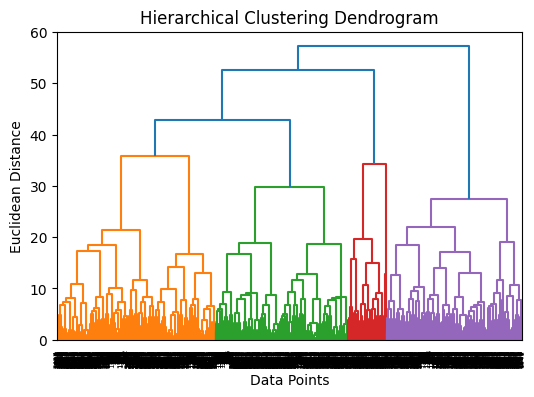

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.sparse import issparse

# Check if X is a sparse matrix and convert to dense if necessary
if issparse(X):
    X = X.toarray()

# Perform hierarchical clustering
linked = linkage(X, method='ward')  # Choose a linkage method (e.g., 'ward', 'single', 'complete')

# Plot dendrogram
plt.figure(figsize=(6, 4))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

Determine Clusters using Dendogram = 4

In [ ]:
# Cut the dendrogram to form clusters
n_clusters = 4  # Set desired number of clusters
df['cluster'] = fcluster(linked, n_clusters, criterion='maxclust')

# View cluster assignments
print(df)

       age  job  marital  education  default  balance  housing  loan  contact  \
83      59    0        1          1        0     2343        1     0        2   
86      56    0        1          1        0       45        0     0        2   
87      41    9        1          1        0     1270        1     0        2   
129     55    7        1          1        0     2476        1     0        2   
168     54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
39986   29    4        2          2        0      637        1     0        0   
39988   55    4        0          2        0     2383        0     0        0   
39990   26    9        2          1        0     1231        1     0        0   
39996   30    4        2          2        0     3340        0     0        0   
39997   54    0        0          1        0      200        0     0        0   

       y  cluster_labels  c

In [ ]:
from collections import defaultdict
# Choose the number of clusters based on the dendrogram (e.g., 4 clusters)
num_clusters = 4

hierarchical = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
df['Cluster'] = hierarchical.fit_predict(X)

# Step 3: Summarize the clusters
cluster_groups = df.groupby('Cluster')

# Initialize a dictionary to store the summary
cluster_summary = defaultdict(list)

# Iterate over each cluster
for cluster, group in cluster_groups:
    cluster_summary['Cluster'].append(cluster)

    # Numerical columns: calculate median
    cluster_summary['Age'].append(group['age'].median())
    cluster_summary['Balance'].append(group['balance'].median())
    #cluster_summary['Median Day'].append(group['day'].median())
    #cluster_summary['Median Duration'].append(group['duration'].median())
    #cluster_summary['Median Campaign'].append(group['campaign'].median())

    # Categorical columns: calculate mode and percentage
    cluster_summary['Job'].append(group['job'].mode()[0])
    cluster_summary['Marital Status'].append(group['marital'].mode()[0])
    cluster_summary['Education'].append(group['education'].mode()[0])
    cluster_summary['Default'].append(group['default'].mode()[0])
    cluster_summary['Housing'].append(group['housing'].mode()[0])
    cluster_summary['Loan'].append(group['loan'].mode()[0])
   # cluster_summary['Most Common Contact'].append(group['contact'].mode()[0])
   # cluster_summary['Most Common Month'].append(group['month'].mode()[0])

# Convert the summary to a DataFrame
summary_df = pd.DataFrame(cluster_summary)

# Display the summary
print(summary_df)

   Cluster   Age  Balance  Job  Marital Status  Education  Default  Housing  \
0        0  37.0    409.0    1               1          1        0        1   
1        1  31.0    467.5    4               2          1        0        0   
2        2  35.0   6554.5    4               2          2        0        0   
3        3  51.0    720.0    4               1          1        0        0   

   Loan  
0     0  
1     0  
2     0  
3     0  


###5. Principal Component Analysis / Dimensinality Reduction

#### 5.1 For K-means

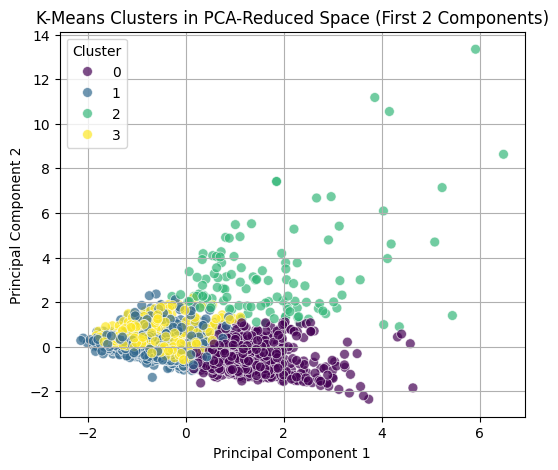

Explained Variance Ratio (PCA1, PCA2, PCA3, PCA4):
PCA1: 0.24, PCA2: 0.20, PCA3: 0.12, PCA4: 0.09


In [ ]:
from sklearn.decomposition import PCA
# Step 1: Apply PCA to reduce data to 4 dimensions (or adjust based on your needs)
pca = PCA(n_components=4, random_state=seed)
pca_data = pca.fit_transform(X)  # Project scaled data to 4D (PCA)

# Step 2: Apply K-Means clustering to the PCA-reduced data
kmeans = KMeans(n_clusters=4, random_state=seed)
cluster_labels = kmeans.fit_predict(pca_data)

# Convert the PCA-transformed data into a DataFrame for visualization
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])
pca_df['Cluster'] = cluster_labels  # Add cluster labels to DataFrame

# Step 3: Visualize clusters in PCA-reduced space (using first two principal components)
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=pca_df['PCA1'],
    y=pca_df['PCA2'],
    hue=pca_df['Cluster'],
    palette='viridis',  # Color palette for clusters
    s=50,  # Marker size
    alpha=0.7  # Marker transparency
)
plt.title('K-Means Clusters in PCA-Reduced Space (First 2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

# Step 4: Print explained variance ratio to understand how much information is retained
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio (PCA1, PCA2, PCA3, PCA4):")
print(f"PCA1: {explained_variance[0]:.2f}, PCA2: {explained_variance[1]:.2f}, PCA3: {explained_variance[2]:.2f}, PCA4: {explained_variance[3]:.2f}")


#### 5.2 For Hierarchical

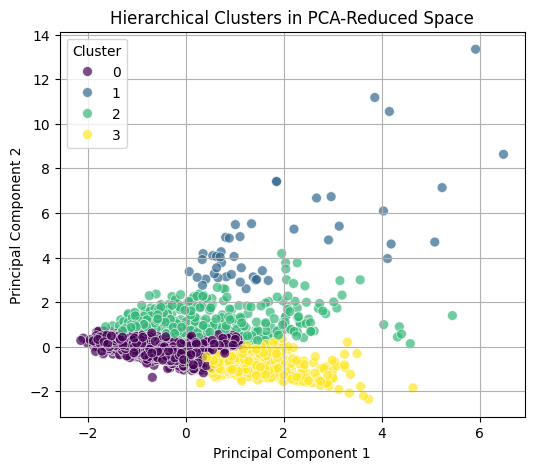

In [ ]:
# Step 1: Apply PCA to reduce data to 2 components (adjust n_components as needed)
pca = PCA(n_components=2, random_state=seed)
pca_data = pca.fit_transform(X)

# Step 2: Apply Agglomerative Hierarchical Clustering on PCA-reduced data
# Perform hierarchical clustering (using Ward's method)
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')  # 4 clusters, change as needed
cluster_labels = hierarchical.fit_predict(pca_data)

# Step 3: Create a DataFrame for PCA components and cluster labels
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Step 4: Visualize the clusters in PCA space
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=pca_df['PCA1'],
    y=pca_df['PCA2'],
    hue=pca_df['Cluster'],
    palette='viridis',  # Color palette for clusters
    s=50,  # Marker size
    alpha=0.7  # Marker transparency
)
plt.title('Hierarchical Clusters in PCA-Reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()


### 6. **Conclusion**


**Clustering Results Summary**

Hierarchical Clustering Results

*Cluster 0:*

Age: Younger group (average age: 37 years).
Balance: Relatively low average balance (€409).
Job: Majority in job blue-collar.
Marital Status & Education: Primarily single and educated to secondary.
Loans: Likely to have housing loans but no personal loans.

*Cluster 1:*

Age: Young adults (average age: 31 years).
Balance: Slightly higher average balance (€467.5).
Job: Predominantly in job type management.
Marital Status: Mostly married.
Loans: No housing or personal loans.

*Cluster 2:*

Age: Middle-aged group (average age: 35 years).
Balance: High balance (€6,554.5), indicating a wealthier segment.
Job: Majority in job type management.
Loans: No housing or personal loans.

*Cluster 3:*

Age: Older adults (average age: 51 years).
Balance: Moderate balance (€720).
Job: Predominantly in job type management.
Marital Status & Education: Mostly single and with secondary education.
Loans: No housing or personal loans.

**K-Means Clustering Results**

*Cluster 0:*

Age: Middle-aged adults (average age: 39.5 years).
Balance: Very high average balance (€10,182.5).
Job: Primarily job type management.
Loans: No housing or personal loans.

*Cluster 1:*

Age: Young adults (average age: 35 years).
Balance: Low average balance (€421).
Job: Predominantly job type blue-collar.
Marital Status & Loans: Mainly single, likely to have housing loans but no personal loans.

*Cluster 2:*

Age: Younger group (average age: 32 years).
Balance: Low average balance (€620).
Job: Primarily in job type management.
Loans: No housing or personal loans.

*Cluster 3:*

Age: Older adults (average age: 53 years).
Balance: Moderate average balance (€763).
Job: Predominantly job type management.
Loans: No housing or personal loans.

**Comparison of Clustering Approaches**

Hierarchical Clustering: Captures clusters with slightly more nuanced segmentation (e.g., balance variability).
Highlights a distinct wealthier segment with high balances in Cluster 2.

K-Means Clustering: Creates clusters with clear centroids but focuses more on broader patterns.
Captures a very wealthy group in Cluster 0 with an extremely high average balance (€10,182.5).

**Business Implications**

1. Target Wealthier Groups:
Clusters with higher balances (e.g., Cluster 2 in hierarchical and Cluster 0 in K-Means) can be prioritized for subscription offers.

2. Customized Campaigns:
Use clustering insights to design personalized marketing strategies for each group, focusing on their demographics, financial attributes, and loan behavior.

3. Resource Optimization:
Focus call efforts on clusters with high subscription likelihood (e.g., those with high balances and housing loans). Avoid unnecessary calls to groups with low balances and limited financial activity.